In [16]:
import math

In [17]:
print(math.pi)

3.141592653589793


In [18]:
import numpy as np

In [19]:
simple_array = np.array( [1,2,3,4] )

In [20]:
simple_array

array([1, 2, 3, 4])

In [23]:
simple_array[::2]

array([1, 3])

### Numpy arrays

- splicing [] works like for lists

### Speed test: list vs array

In [26]:
LargeNum = 999999
# basic python
%timeit sum( list( range(LargeNum)))

10 loops, best of 3: 44.9 ms per loop


In [27]:
# numpy way
%timeit np.sum( np.arange(LargeNum))

1000 loops, best of 3: 1.43 ms per loop


Numpy is much much faster!!

### Boolean indexing

In [28]:
ar0 = np.arange(23)

In [29]:
ar0

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22])

In [31]:
boolean_ar = ar0 > 10 

In [32]:
boolean_ar

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True], dtype=bool)

In [34]:
boolean_ar2 = ar0 < 4

In [35]:
ar0

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22])

In [36]:
ar0[boolean_ar]

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22])

In [37]:
ar0[boolean_ar2]

array([0, 1, 2, 3])

In [38]:
ar0 == 12

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False], dtype=bool)

In [39]:
boolean_ar2 # < 4 boolean index array

array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False], dtype=bool)

In [40]:
smaller_4 = np.sum(boolean_ar2)

In [41]:
smaller_4

4

#### Make some mockup data

In [44]:
time_vector = np.arange(0, 20, step = 0.05)
len(time_vector)

400

In [49]:
from numpy.random import randn # gaussian random numbers
randn(3) # get 3 random numbers

array([-2.30254307, -0.25448129,  1.27736942])

In [117]:
# create synthetic data
data = 5 * np.exp(-0.2 * time_vector) + 1 
len(data)
data_with_noise = data + randn( len(data) )

Let's suppose we expect our 'data' to behave like this:


\begin{equation*}
\Large
f(t) = A \; e^{-\lambda t} + c
\end{equation*}

In [13]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
# jupyter 'magic'
%matplotlib inline 

# we want to plot time over data
len(time_vector) == len(data_with_noise) # check equal length
plt.plot(time_vector, data_with_noise, 'o', color = 'orange', alpha = 0.5)
plt.plot(time_vector, data, '-',color = 'black')

NameError: name 'time_vector' is not defined


\begin{equation*}
\Large
f(t) = A \; e^{-\lambda t} + c
\end{equation*}

**_Exercise 5.6_**

Write a Python function encoding the mathematical function above. The 1st argument should be the free variable $t$. 

In [77]:
def my_exp(t, A, lam, c = 1):
    result = A * np.exp(-lam * t) + c
    return result

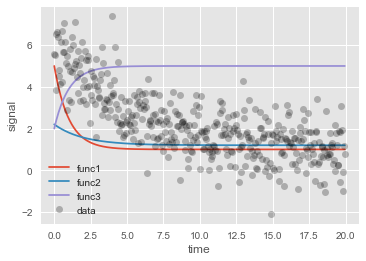

In [99]:
plt.plot(time_vector, my_exp(time_vector, 4, 1, 1), label = 'func1')
plt.plot(time_vector, my_exp(time_vector, 1, 0.5, 1.2), label = 'func2')
plt.plot(time_vector, my_exp(time_vector, -3, 1, 5), label = 'func3')
plt.plot(time_vector, data_with_noise, 'ko', label = 'data', alpha = 0.25)
plt.legend()
plt.xlabel('time')
plt.ylabel('signal')

In [101]:
my_exp(0,1,1,1)

2.0

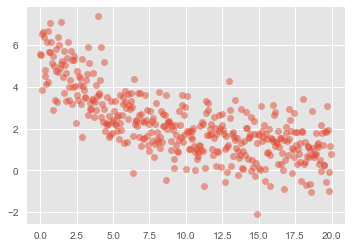

In [102]:
plt.plot(time_vector, data_with_noise, 'o', alpha = 0.5)

In [119]:
import scipy.optimize as so
fit_result = so.curve_fit(my_exp, time_vector, data_with_noise)
fitted_pars = fit_result[0]

400
[ 5.06441984  0.19583205  1.04805003] [5, 0.2, 1]


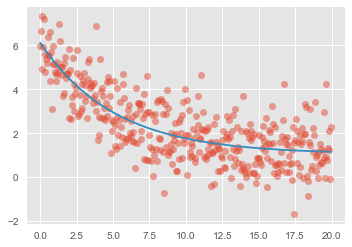

In [120]:

fit = my_exp(time_vector, *fitted_pars)
print(len(fit))
plt.plot(time_vector, data_with_noise, 'o', alpha = 0.5)
plt.plot(time_vector, fit)
orig_pars = [5,0.2,1]
print(fitted_pars, orig_pars)

In [11]:
# let's import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('speciesDistribution_tabular.txt', sep='\t', index_col = 0)

In [164]:
df.head() # let's take a look

,Grimston Wood,Hagg Wood,Hetchell Wood N,Hetchell Wood S,Scoreby Wood,Sutton Wood,Wheldrake Wood
taxonID,,,,,,,
A,123,2039,12983,9380,920,883,0
B,1340,9394,8493,13928,3928,293,91
C,11984,19380,948,0,0,893,22649
D,0,9102,9384,949,9301,18990,2949
E,9389,932,4942,19023,19384,0,901


In [127]:
df.shape # what are the dimensions?

(13, 8)

In [135]:
df.columns # these are the column names

Index(['taxonID', 'Grimston Wood', 'Hagg Wood', 'Hetchell Wood N',
       'Hetchell Wood S', 'Scoreby Wood', 'Sutton Wood', 'Wheldrake Wood'],
      dtype='object')

In [167]:
df.index 

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M'], dtype='object', name='taxonID')

In [168]:
df['Sutton Wood'] # access single column

taxonID
A      883
B      293
C      893
D    18990
E        0
F     3910
G      930
H     1738
I      819
J        0
K        0
L        0
M     9934
Name: Sutton Wood, dtype: int64

In [141]:
df.iloc[3:,-2:] # access to 3rd row like in a numpy array

,Sutton Wood,Wheldrake Wood
3,18990,2949
4,0,901
5,3910,0
6,930,9204
7,1738,2040
8,819,8173
9,0,0
10,0,0
11,0,6781
12,9934,9184


In [146]:
print(df.mean(), df.columns)

Grimston Wood      2832.692308
Hagg Wood          4451.153846
Hetchell Wood N    4401.923077
Hetchell Wood S    5155.230769
Scoreby Wood       4652.153846
Sutton Wood        2953.076923
Wheldrake Wood     4767.076923
dtype: float64 Index(['taxonID', 'Grimston Wood', 'Hagg Wood', 'Hetchell Wood N',
       'Hetchell Wood S', 'Scoreby Wood', 'Sutton Wood', 'Wheldrake Wood'],
      dtype='object')


In [14]:
site_mean = df.loc['D']
xloc = np.arange( len(site_mean))
xloc

array([0, 1, 2, 3, 4, 5, 6])

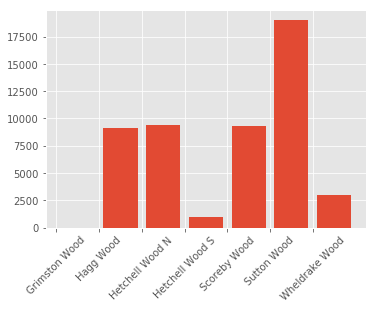

In [15]:
plt.bar(xloc, site_mean)
plt.xticks(xloc-0.5, site_mean.index, rotation = 45)
print()

In [171]:
df.loc['G':'J','Grimnston Wood':'Sutton Wood']

,Grimston Wood,Hagg Wood,Hetchell Wood N,Hetchell Wood S,Scoreby Wood,Sutton Wood
taxonID,,,,,,
G,1283,893,9834,948,0,930
H,0,5839,0,9284,3892,1738
I,0,0,1293,0,9192,819
J,8193,9302,9348,1093,0,0


In [169]:
df.index

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M'], dtype='object', name='taxonID')